<ipython-input-2-5978a04baaf8>:4: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/gdrive/MyDrive/Accenture #1 (NYC) - Guess the Credit Score (Team B)/dataset/train.csv')


In [2]:
#Import the libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/Users/floriancharles/PycharmProjects/BTT-Accenture/train.csv")

/var/folders/jz/hctny6ls32v0jgknqw5ss69m0000gn/T/ipykernel_4878/551859610.py:7: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/floriancharles/Desktop/archive/train.csv")


Let's start with our preliminary analysis of the data:

In [3]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [4]:
print("Dataset Overview:")
print(f"Number of rows: {len(df)}")
print(f"Number of columns: {len(df.columns)}")
print("\nColumn Names:")
print(df.columns)

# Display the first few rows of the dataset
print("\nFirst 5 Rows of the Dataset:")
print(df.head())

# Display summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(df.describe())

# Display data types and non-null counts for each column
print("\nData Types and Non-Null Counts:")
print(df.info())

#Display the null count for each column
print("Count of Null Values for Each Column:")
print(df.isnull().sum())

Dataset Overview:
Number of rows: 100000
Number of columns: 28

Column Names:
Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

First 5 Rows of the Dataset:
       ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-

Analysis: There's plenty of colums with null values, we'll have to clean them up.

----------------------------------------------------------------------------------------------------------------------------------------------------------

Adding histogram for numerical columns and get a general overview of the data.

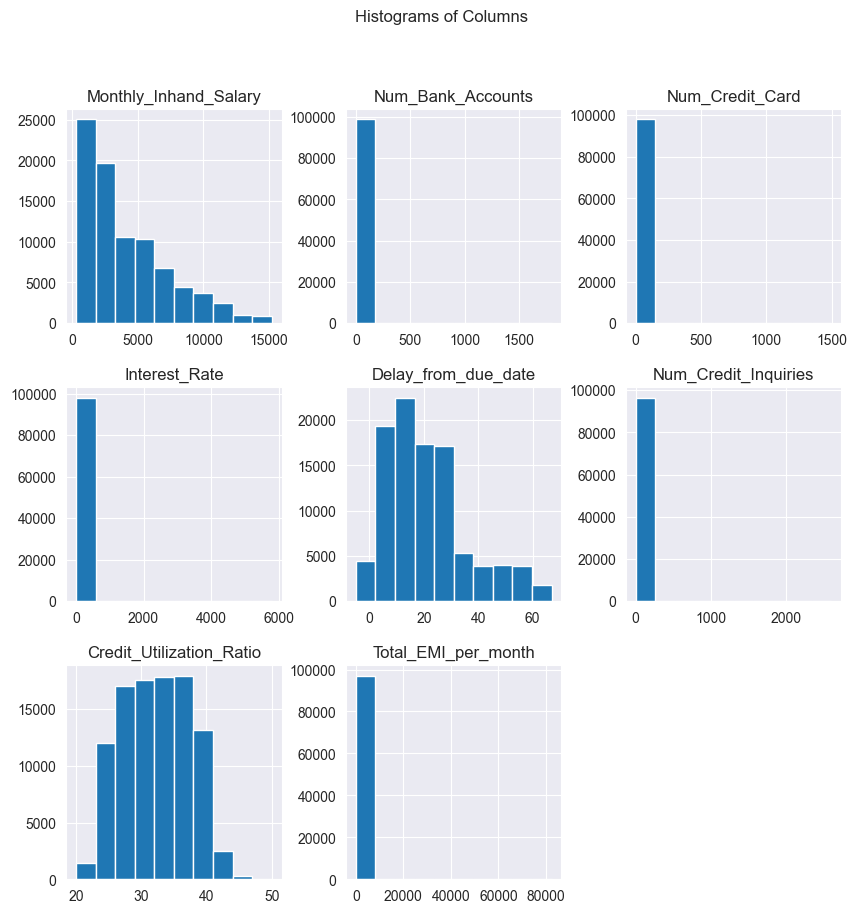

In [5]:
df.hist(bins=10, figsize=(10, 10))
plt.suptitle('Histograms of Columns')
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------------------------

Cleaning of the Credit History Age Cleaned Code: 📆

In [6]:
# Replace non-numeric values with NaN
df["Changed_Credit_Limit"] = pd.to_numeric(df["Changed_Credit_Limit"], errors='coerce')

# Now you can safely convert the type because all non-numeric values are NaN
df["Changed_Credit_Limit"] = df["Changed_Credit_Limit"].astype(float)

# Function to convert 'Credit_History_Age' from "X Years and Y Months" to "X.Y"
def convert_to_year_month(cha):
    if pd.notna(cha) and isinstance(cha, str):
        # Split the string into components
        parts = cha.split(' ')
        # Extract years and months as integers
        years = int(parts[0])
        months = int(parts[3]) / 12  # Convert months to a fraction of a year
        return round(years + months, 1)  # Return the sum as a float rounded to one decimal place
    else:
        return cha  # Return the original value if it's not a string


df['Credit_History_Age'] = df['Credit_History_Age'].apply(convert_to_year_month)

# Calculate the mode 'Credit_History_Age' value for each 'Customer_ID'
mode_cha_by_customer = df.groupby('Customer_ID')['Credit_History_Age'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index(name='Mode_CHA')

# Merge the mode dataframe with the original dataframe
df = df.merge(mode_cha_by_customer, on='Customer_ID', how='left')


df['Credit_History_Age'].fillna(df['Mode_CHA'], inplace=True)

df.drop(columns=['Mode_CHA'], inplace=True)

# Display the first few rows of the dataframe to verify the changes
df["Changed_Credit_Limit"]= df["Changed_Credit_Limit"].astype(float)
print(df.head())


       ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio Credi

----------------------------------------------------------------------------------------------------------------------------------------------------------

Age Clean Code:👶 🧑 🧓


In [7]:
def clean_age(age):
    # Convert to string and remove underscores
    age = str(age).replace('_', '')
    try:
        age = int(age)
        if age < 0 or age > 100:  
            age = None
    except ValueError:
        age = None
    return age


----------------------------------------------------------------------------------------------------------------------------------------------------------

SSN Clean Code:🤫

In [8]:
def clean_ssn(ssn):
    if ssn is not None:
        ssn = ''.join(filter(str.isdigit, str(ssn)))
        if len(ssn) == 9:
            return ssn[:3] + '-' + ssn[3:5] + '-' + ssn[5:]
    return None

df['SSN'] = df.groupby('Customer_ID')['SSN'].transform(lambda x: x.apply(clean_ssn))

mode_ssn_by_customer = df.groupby('Customer_ID')['SSN'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA).reset_index()

df = df.merge(mode_ssn_by_customer, on='Customer_ID', suffixes=('', '_mode'))

df['SSN'].fillna(df['SSN_mode'], inplace=True)

df.drop(columns=['SSN_mode'], inplace=True)

# Handle missing values before converting to integers
df['SSN'] = df['SSN'].replace('-', '', regex=True)
df['SSN'] = df['SSN'].fillna(0).astype(int)

print(df['SSN'])


0        821000265
1        821000265
2        821000265
3        821000265
4        821000265
           ...    
99995     78735990
99996     78735990
99997     78735990
99998     78735990
99999     78735990
Name: SSN, Length: 100000, dtype: int64


----------------------------------------------------------------------------------------------------------------------------------------------------------

Occupation Clean Code: 👷 💼 📆



In [9]:
def clean_occupation(occupation):
    # Remove underscores and handle empty strings
    cleaned_occupation = occupation.replace('_', '').strip()
    if cleaned_occupation == "":
        return None
    else:
        return cleaned_occupation

# Apply the cleaning function to 'Occupation' within each 'Customer_ID' group
df['Occupation'] = df.groupby('Customer_ID')['Occupation'].transform(lambda x: x.apply(clean_occupation))
# fills NaN with the mode
df['Occupation'] = df.groupby('Customer_ID')['Occupation'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else pd.NA))


Payment Behavior clean code


In [10]:
df['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

In [11]:
# Define a function to remove the specific anomaly and replace it with the mode
def remove_specific_anomaly_and_replace_with_mode(group):

    # Replace the specific anomaly with null
    group['Payment_Behaviour'] = group['Payment_Behaviour'].replace('!@9#%8', pd.NA)

    # Replace the null values with the mode
    group['Payment_Behaviour'].fillna(group['Payment_Behaviour'].mode().iloc[0], inplace=True)

    return group

# Remove the specific anomaly and replace it with the mode
df = df.groupby('Customer_ID').apply(remove_specific_anomaly_and_replace_with_mode).reset_index(drop=True)

In [12]:
df['Payment_Behaviour'].unique()

array(['Low_spent_Large_value_payments',
       'High_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'Low_spent_Medium_value_payments',
       'High_spent_Large_value_payments'], dtype=object)

Num_of_Delayed_Payment and Outstanding_Debt cleanup

In [13]:
def clean_and_convert(value):
    if isinstance(value, str):
        # Remove underscores and try to convert to numeric type
        cleaned_value = value.replace('_', '')
        try:
            numeric_value = float(cleaned_value)
            return numeric_value
        except ValueError:
            try:
                numeric_value = float(cleaned_value)
                return numeric_value
            except ValueError:
                return value
    elif isinstance(value, float):
        # Already a numeric value, return it
        return value
    else:
        # Non-numeric value, return it as is
        return value

In [14]:
#Apply the clean and convert function to remove all underscores, convert all to floats. column should now be dtype float64
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].apply(clean_and_convert)

#Fill in the blanks of the num_of_delayed_payment column with the average of the values associated with that specific customer
df['Num_of_Delayed_Payment'] = df.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(lambda x: x.fillna(math.floor(x.mean())))

In [15]:
print(df['Num_of_Delayed_Payment'].describe())

count    100000.000000
mean         30.862500
std         219.236737
min          -3.000000
25%           9.000000
50%          14.000000
75%          18.000000
max        4397.000000
Name: Num_of_Delayed_Payment, dtype: float64


In [16]:
#Same for outstanding debt
df['Outstanding_Debt'] = df['Outstanding_Debt'].apply(clean_and_convert)

In [17]:
print(df['Outstanding_Debt'].describe())

count    100000.000000
mean       1426.220376
std        1155.129026
min           0.230000
25%         566.072500
50%        1166.155000
75%        1945.962500
max        4998.070000
Name: Outstanding_Debt, dtype: float64


Credit_Mix Cleaning

In [18]:
# Replace underscores with NaN to make it easier
df['Credit_Mix'] = df['Credit_Mix'].replace('_', pd.NA)

# Fill NaN values with corresponding values based on 'Customer_ID'
df['Credit_Mix'] = df.groupby('Customer_ID')['Credit_Mix'].transform('first')

In [19]:
#Perform one-hot encoding to transform categorical into numerical data
df = pd.get_dummies(df, columns=['Credit_Mix'])

In [20]:
print(df["Credit_Utilization_Ratio"].describe())

count    100000.000000
mean         32.285173
std           5.116875
min          20.000000
25%          28.052567
50%          32.305784
75%          36.496663
max          50.000000
Name: Credit_Utilization_Ratio, dtype: float64


Type_of_Loan

In [21]:
#Before
def clean_loan_types(row):
    if pd.isna(row) or not row.strip():
        return 'Empty Rows'
    elif row.lower() == 'not specified':
        return 'Not Specified'
    elif isinstance(row, str):

        # Split the row by commas and remove empty strings, leading/trailing spaces, and "and"
        loan_types = [loan.strip() for loan in row.split(',') if loan.strip()]
        # Remove duplicates and variations like "and ..."
        loan_types = list(set([loan if not loan.lower().startswith('and') else loan[4:].strip() for loan in loan_types]))
        # Sort the loan types alphabetically
        loan_types.sort()
        # Remove "empty" if it exists
        loan_types = [loan if loan.lower() != 'empty' else 'Empty Rows' for loan in loan_types]
        return ', '.join(loan_types)
    else:
        return 'Empty Rows'

# Apply the cleaning function to each row in the Type_of_Loan column and update the column in the DataFrame
df['Type_of_Loan'] = df['Type_of_Loan'].apply(clean_loan_types)
print("\nAfter Cleaning, before mapping:")
print(df['Type_of_Loan'].iloc[32:51])


After Cleaning, before mapping:
32    Debt Consolidation Loan, Personal Loan, Studen...
33    Debt Consolidation Loan, Personal Loan, Studen...
34    Debt Consolidation Loan, Personal Loan, Studen...
35    Debt Consolidation Loan, Personal Loan, Studen...
36    Debt Consolidation Loan, Personal Loan, Studen...
37    Debt Consolidation Loan, Personal Loan, Studen...
38    Debt Consolidation Loan, Personal Loan, Studen...
39    Debt Consolidation Loan, Personal Loan, Studen...
40                                           Empty Rows
41                                           Empty Rows
42                                           Empty Rows
43                                           Empty Rows
44                                           Empty Rows
45                                           Empty Rows
46                                           Empty Rows
47                                           Empty Rows
48    Credit-Builder Loan, Home Equity Loan, Not Spe...
49    Credit-Bu

In [22]:
#After
# Define a mapping dictionary to map loan types to integer codes
loan_type_mapping = {
    "Empty Rows": 0,
    "Not Specified": 1,
    "Auto Loan": 2,
    "Credit-Builder Loan": 3,
    "Home Equity Loan": 4,
    "Personal Loan": 5,
    "Mortgage Loan": 6,
    "Student Loan": 7,
    "Debt Consolidation Loan": 8,
    "Payday Loan": 9,
}

# Function to map multiple loan types to a list of corresponding integers
def map_loan_types_to_integers(row):
    if pd.isna(row) or row == 'NaN':
        return 'NaN'
    elif isinstance(row, str):
        loan_types = [loan_type_mapping[loan.strip()] for loan in row.split(', ')]
        return ', '.join(map(str, loan_types))
    else:
        return 'Empty Rows'

# Apply the mapping function to each row in the Type_of_Loan column
df['Type_of_Loan'] = df['Type_of_Loan'].apply(map_loan_types_to_integers)

# Convert the 'Type_of_Loan' column to float
df['Type_of_Loan'] = df['Type_of_Loan'].apply(lambda x: float(x) if isinstance(x, (int, float)) else x)

# Display the DataFrame with float codes
print('\nAfter cleaning, after mapping:')
print(df['Type_of_Loan'].iloc[31:51])


After cleaning, after mapping:
31             3, 8, 7
32             8, 5, 7
33             8, 5, 7
34             8, 5, 7
35             8, 5, 7
36             8, 5, 7
37             8, 5, 7
38             8, 5, 7
39             8, 5, 7
40                   0
41                   0
42                   0
43                   0
44                   0
45                   0
46                   0
47                   0
48    3, 4, 1, 9, 5, 7
49    3, 4, 1, 9, 5, 7
50    3, 4, 1, 9, 5, 7
Name: Type_of_Loan, dtype: object


In [23]:
# Convert the 'Type_of_Loan' column to float
df['Type_of_Loan'] = df['Type_of_Loan'].apply(lambda x: float(x) if isinstance(x, (int, float)) else x)

Num_of_Loan

In [24]:
# Convert 'Num_of_Loan' to string and then remove special characters
df['Num_of_Loan'] = df['Num_of_Loan'].astype(str).str.replace(r'[^0-9.]', '', regex=True)

# Convert 'Num_of_Loan' to numeric, handling errors as 'coerce' (invalid parsing will be set as NaN)
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce')

# Fill missing values with a specific value (e.g., -1)
df['Num_of_Loan'].fillna(-1, inplace=True)

# Convert negative numbers to -1
df.loc[df['Num_of_Loan'] < 0, 'Num_of_Loan'] = -1

# Calculate mean and median
mean_num_of_loan = df['Num_of_Loan'].mean()
median_num_of_loan = df['Num_of_Loan'].median()

print("Mean of Num_of_Loan:", mean_num_of_loan)
print("Median of Num_of_Loan:", median_num_of_loan)

Mean of Num_of_Loan: 10.76196
Median of Num_of_Loan: 3.0


Num_Credit_Card

In [25]:
# Display the original statistics
print('Original Statistics:')
print(df['Num_Credit_Card'].describe())

# Convert 'Num_Credit_Card' to string and then remove special characters
df['Num_Credit_Card'] = df['Num_Credit_Card'].astype(str).str.replace(r'\D', '', regex=True)

# Convert 'Num_Credit_Card' to numeric, handling errors as 'coerce' (invalid parsing will be set as NaN)
df['Num_Credit_Card'] = pd.to_numeric(df['Num_Credit_Card'], errors='coerce')

# Fill missing values with mean
df['Num_Credit_Card'].fillna(df['Num_Credit_Card'].mean(), inplace=True)

# Define a threshold for outliers (e.g., 15, adjust as needed)
threshold = 15

# Turn outliers into -1
df.loc[df['Num_Credit_Card'] > threshold, 'Num_Credit_Card'] = -1

# Display the statistics after cleaning
print('\nStatistics after cleaning:')
print(df['Num_Credit_Card'].describe())

# Calculate mean and median
mean_num_credit_card = df['Num_Credit_Card'].mean()
median_num_credit_card = df['Num_Credit_Card'].median()

# Display mean and median
print('\nMean Num_Credit_Card:', mean_num_credit_card)
print('Median Num_Credit_Card:', median_num_credit_card)



Original Statistics:
count    100000.00000
mean         22.47443
std         129.05741
min           0.00000
25%           4.00000
50%           5.00000
75%           7.00000
max        1499.00000
Name: Num_Credit_Card, dtype: float64

Statistics after cleaning:
count    100000.000000
mean          5.385430
std           2.264333
min          -1.000000
25%           4.000000
50%           5.000000
75%           7.000000
max          15.000000
Name: Num_Credit_Card, dtype: float64

Mean Num_Credit_Card: 5.38543
Median Num_Credit_Card: 5.0


Analyzing Num_Bank_Accounts

In [26]:
# Display the original statistics
print('Original Statistics:')
print(df['Num_Bank_Accounts'].describe())

# Convert 'Num_Bank_Accounts' to string and then remove special characters
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].astype(str).str.replace(r'\D', '', regex=True)

# Convert 'Num_Bank_Accounts' to numeric, handling errors as 'coerce' (invalid parsing will be set as NaN)
df['Num_Bank_Accounts'] = pd.to_numeric(df['Num_Bank_Accounts'], errors='coerce')

# Fill missing values with a specific method (e.g., mean, median, or any other method)
# Let's use mean for this example
df['Num_Bank_Accounts'].fillna(df['Num_Bank_Accounts'].mean(), inplace=True)

# Define a threshold for outliers (e.g., 50, adjust as needed)
threshold_bank_accounts = 50

# Turn outliers into -1
df.loc[df['Num_Bank_Accounts'] > threshold_bank_accounts, 'Num_Bank_Accounts'] = -1

# Display the statistics after cleaning
print('\nStatistics after cleaning:')
print(df['Num_Bank_Accounts'].describe())

# Calculate mean and median
mean_num_bank_accounts = df['Num_Bank_Accounts'].mean()
median_num_bank_accounts = df['Num_Bank_Accounts'].median()

# Display mean and median
print('\nMean Num_Bank_Accounts:', mean_num_bank_accounts)
print('Median Num_Bank_Accounts:', median_num_bank_accounts)


Original Statistics:
count    100000.000000
mean         17.091280
std         117.404834
min          -1.000000
25%           3.000000
50%           6.000000
75%           7.000000
max        1798.000000
Name: Num_Bank_Accounts, dtype: float64

Statistics after cleaning:
count    100000.000000
mean          5.297270
std           2.737622
min          -1.000000
25%           3.000000
50%           5.000000
75%           7.000000
max          50.000000
Name: Num_Bank_Accounts, dtype: float64

Mean Num_Bank_Accounts: 5.29727
Median Num_Bank_Accounts: 5.0


Analyzing Interest_Rate

In [27]:
# Display the original statistics
print('Original Statistics:')
print(df['Interest_Rate'].describe())

# Convert 'Interest_Rate' to string and then remove special characters
df['Interest_Rate'] = df['Interest_Rate'].astype(str).str.replace(r'\D', '', regex=True)

# Convert 'Interest_Rate' to numeric, handling errors as 'coerce' (invalid parsing will be set as NaN)
df['Interest_Rate'] = pd.to_numeric(df['Interest_Rate'], errors='coerce')

# Fill missing values with a specific method (e.g., mean, median, or any other method)
# Let's use mean for this example
df['Interest_Rate'].fillna(df['Interest_Rate'].mean(), inplace=True)

# Define a threshold for outliers (e.g., 35.99, adjust as needed)
threshold_interest_rate = 35.99

# Turn outliers into -1
df.loc[df['Interest_Rate'] > threshold_interest_rate, 'Interest_Rate'] = -1

# Display the statistics after cleaning
print('\nStatistics after cleaning:')
print(df['Interest_Rate'].describe())

# Calculate mean and median
mean_interest_rate = df['Interest_Rate'].mean()
median_interest_rate = df['Interest_Rate'].median()

# Display mean and median
print('\nMean Interest_Rate:', mean_interest_rate)
print('Median Interest_Rate:', median_interest_rate)


Original Statistics:
count    100000.000000
mean         72.466040
std         466.422621
min           1.000000
25%           8.000000
50%          13.000000
75%          20.000000
max        5797.000000
Name: Interest_Rate, dtype: float64

Statistics after cleaning:
count    100000.000000
mean         14.215690
std           8.923924
min          -1.000000
25%           7.000000
50%          13.000000
75%          20.000000
max          34.000000
Name: Interest_Rate, dtype: float64

Mean Interest_Rate: 14.21569
Median Interest_Rate: 13.0


Analyzing the  Monthly_Inhand_Salary 💵

In [28]:
#We're going to replace the missing values of this column with the values of the rows above or below
df['Monthly_Inhand_Salary'].fillna(method='ffill', inplace=True)
df['Monthly_Inhand_Salary'].fillna(method='bfill', inplace=True)

#Now let's check to see if all the missing values have been delat with
print(f" The number of missing values is: {df['Monthly_Inhand_Salary'].isnull().sum()}")


# Calculate mean and median
mean_monthly_Inhand_salary = df['Monthly_Inhand_Salary'].mean()
median_monthly_Inhand_salary = df['Monthly_Inhand_Salary'].median()


print('\nMean Monthly_Inhand_Salary:',mean_monthly_Inhand_salary )
print('Median Monthly_Inhand_Salary:', median_monthly_Inhand_salary )
print(df.Monthly_Inhand_Salary.dtype)

 The number of missing values is: 0

Mean Monthly_Inhand_Salary: 4197.878123525905
Median Monthly_Inhand_Salary: 3093.153333333333
float64


/var/folders/jz/hctny6ls32v0jgknqw5ss69m0000gn/T/ipykernel_4878/4105310279.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Monthly_Inhand_Salary'].fillna(method='ffill', inplace=True)
/var/folders/jz/hctny6ls32v0jgknqw5ss69m0000gn/T/ipykernel_4878/4105310279.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Monthly_Inhand_Salary'].fillna(method='bfill', inplace=True)


In [29]:
# Credit card analyst
print(df["Changed_Credit_Limit"].describe())
print("\n")

#Let's see how many missing values represented by an underscore ("_") we have
specific = '_'
count = (df['Changed_Credit_Limit'] == specific).sum()
print('The number of missing values represented by an underscore is:', count)

# Let's replace the "_" values with -1 of the column
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace('_', -1)
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].astype(float)


# Calculate mean and median
mean_ = df['Changed_Credit_Limit'].mean()
median_ = df['Changed_Credit_Limit'].median()


print('\nMean Changed_Credit_Limit:',mean_ )
print('Median Changed_Credit_Limit:', median_ )
print(df.Changed_Credit_Limit.dtype)


count    97909.000000
mean        10.389025
std          6.789496
min         -6.490000
25%          5.320000
50%          9.400000
75%         14.870000
max         36.970000
Name: Changed_Credit_Limit, dtype: float64


The number of missing values represented by an underscore is: 0

Mean Changed_Credit_Limit: 10.389025115157953
Median Changed_Credit_Limit: 9.4
float64


In [30]:

# Handling missing values
missing_values = df['Annual_Income'].isnull().sum()
print("\n")
# Removing underscores and converting to numerical format
df['Annual_Income'] = df['Annual_Income'].replace('_', '', regex=True)
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'], errors='coerce')
print(df.Annual_Income.dtype)





float64


# Change Credit Score into numerical values


In [32]:
print(df["Credit_Score"].unique())

df['Credit_Score'] = df['Credit_Score'].apply(lambda x: 3 if x == 'Good' else x)
df['Credit_Score'] = df['Credit_Score'].apply(lambda x: 1 if x == 'Poor' else x)
df['Credit_Score'] = df['Credit_Score'].apply(lambda x: 2 if x == 'Standard' else x)



df["Credit_Score"]= df["Credit_Score"].astype(float)
print(df.Credit_Score.dtype)


[2. 1. 3.]
float64


In [33]:
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].apply(lambda x: -1 if x == 'NM' else x)
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].apply(lambda x: 1 if x == 'Yes' else x)
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].apply(lambda x: 0 if x == 'No' else x)
df["Payment_of_Min_Amount"].unique()
df['Payment_of_Min_Amount'] = pd.to_numeric(df['Payment_of_Min_Amount'])
print(df.Payment_of_Min_Amount.dtype)
df["Payment_of_Min_Amount"].unique()

int64


array([ 1, -1,  0])

In [34]:
df.Monthly_Balance=df.Monthly_Balance.fillna('0.0')
def take(x):
    s=''
    for i in str(x):
        if (i.isnumeric()) or (i=='.'):
            s=s+i
    return s
df.Monthly_Balance=df.Monthly_Balance.apply(take)
df.Monthly_Balance=df.Monthly_Balance.astype('float')
df.loc[df.Monthly_Balance>1700]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard
12174,0xc0d8,CUS_0x288d,July,Selamk,55,970198342,Lawyer,30748.930,2572.410833,1,...,19.4,0,43.727774,79.07180674947499,High_spent_Small_value_payments,3.333333e+26,2.0,False,True,False
13742,0xf84c,CUS_0x2b77,July,Longstretho,21,6360111,Doctor,15167.620,1471.968333,4,...,27.2,-1,9.930809,128.87587207680795,Low_spent_Small_value_payments,3.333333e+26,2.0,False,True,False
16031,0x1fdd1,CUS_0x2f7e,August,Sabina Zawadzkif,31,109482095,Doctor,126353.040,10635.420000,4,...,31.8,0,167.043910,549.7661392945339,Low_spent_Medium_value_payments,3.333333e+26,1.0,False,False,True
25494,0x1fbd8,CUS_0x41bf,July,Doeringq,44,693647611,Journalist,61990.520,4900.876667,10,...,13.7,-1,355.143396,194.28348839148083,Low_spent_Small_value_payments,3.333333e+26,2.0,True,False,False
38003,0x1ceed,CUS_0x57f3,April,Kristen Haysq,29,577850830,Mechanic,60904.590,5080.382500,3,...,12.9,1,61.525140,394.8939566733383,Low_spent_Small_value_payments,3.333333e+26,2.0,False,False,True
39305,0xaf63,CUS_0x5a90,February,Scuffhamq,45,264531943,Engineer,29728.310,2551.359167,3,...,31.8,0,34.496445,198.6115126951797,Low_spent_Large_value_payments,3.333333e+26,3.0,False,True,False
62810,0xe66c,CUS_0x85e9,March,Anna Driveri,45,288627562,Musician,20929.295,1704.107917,5,...,21.6,0,13798.000000,220.30455197823662,Low_spent_Small_value_payments,3.333333e+26,2.0,False,True,False
72953,0x367f,CUS_0x9885,February,Paul Dayl,17,186499679,Developer,41086.400,3660.866667,3,...,11.5,1,145.544320,201.1429928919469,Low_spent_Medium_value_payments,3.333333e+26,2.0,False,False,True
94753,0x1759f,CUS_0xc06e,February,radenp,30,46725387,Journalist,92114.680,7811.223333,3,...,20.8,1,54.219664,NaN,High_spent_Large_value_payments,3.333333e+26,2.0,False,False,True


In [35]:
df.Amount_invested_monthly.fillna(value='10000',inplace=True)
df.Amount_invested_monthly=df.Amount_invested_monthly.apply(take)
df.Amount_invested_monthly=df.Amount_invested_monthly.astype('float')
np.quantile(df.Amount_invested_monthly,0.911)
df.loc[df.Amount_invested_monthly>1452]
ssn=df.groupby('Customer_ID')['Amount_invested_monthly'].median().index
vals=df.groupby('Customer_ID')['Amount_invested_monthly'].median().values
for x,y in zip(ssn,vals):
    df.loc[(df.Customer_ID==x) & (df.Amount_invested_monthly>1452),'Amount_invested_monthly']=y

In [36]:
ssn=df.groupby('Customer_ID')['Num_Credit_Inquiries'].median().index
vals=df.groupby('Customer_ID')['Num_Credit_Inquiries'].median().values
for x,y in zip(ssn,vals):
    df.loc[df.Customer_ID==x,'Num_Credit_Inquiries']=y
    df['Num_Credit_Inquiries'].fillna(0, inplace=True)

    df.Num_Credit_Inquiries=df.Num_Credit_Inquiries.astype('int')

/var/folders/jz/hctny6ls32v0jgknqw5ss69m0000gn/T/ipykernel_4878/2974869295.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '5.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df.Customer_ID==x,'Num_Credit_Inquiries']=y
/var/folders/jz/hctny6ls32v0jgknqw5ss69m0000gn/T/ipykernel_4878/2974869295.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '13.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df.Customer_ID==x,'Num_Credit_Inquiries']=y
/var/folders/jz/hctny6ls32v0jgknqw5ss69m0000gn/T/ipykernel_4878/2974869295.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '10.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df.Custome

In [37]:
# Mapping of month names to numeric values
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

# Apply the mapping to the 'Month' column
df['Month'] = df['Month'].map(month_mapping)

In [38]:
# Convert Customer_ID column to decimal equivalent
df['Customer_ID'] = df['Customer_ID'].str.replace('CUS_0x', '').apply(lambda x: float(int(x, 16)))

In [39]:
def convert_to_decimal(x):
    try:
        # Remove any potential floating point and convert to integer with base 16
        return float(int(str(x).split('.')[0], 16))
    except ValueError:
        # Return NaN or some default value if conversion fails
        return float('nan')

# Convert Customer_ID to string, remove the prefix, and then apply the conversion
df['Customer_ID'] = df['Customer_ID'].astype(str).str.replace('CUS_0x', '').apply(convert_to_decimal)


In [40]:
df.head(15)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard
0,0x1628a,16534.0,1,Alistair Barrf,17,913741218,Lawyer,30625.94,2706.161667,6,...,10.2,1,42.941090,244.750283,Low_spent_Large_value_payments,252.924793,2.0,True,False,False
1,0x1628b,16534.0,2,NaN,17,913741218,Lawyer,30625.94,2706.161667,6,...,10.2,1,42.941090,176.132567,High_spent_Small_value_payments,311.542510,1.0,True,False,False
2,0x1628c,16534.0,3,Alistair Barrf,17_,913741218,Lawyer,30625.94,2706.161667,6,...,10.3,1,42.941090,109.056519,High_spent_Medium_value_payments,368.618557,1.0,True,False,False
3,0x1628d,16534.0,4,Alistair Barrf,17,913741218,Lawyer,30625.94,2706.161667,6,...,10.4,1,42.941090,87.909909,High_spent_Medium_value_payments,419.765167,1.0,True,False,False
4,0x1628e,16534.0,5,Alistair Barrf,17,913741218,Lawyer,30625.94,2706.161667,6,...,10.5,1,42.941090,191.834767,Low_spent_Large_value_payments,305.840309,1.0,True,False,False
5,0x1628f,16534.0,6,Alistair Barrf,18,913741218,Lawyer,30625.94,2706.161667,6,...,10.6,1,42.941090,114.802401,High_spent_Small_value_payments,372.872676,1.0,True,False,False
6,0x16290,16534.0,7,Alistair Barrf,18,913741218,Lawyer,30625.94,2706.161667,6,...,10.7,1,42.941090,266.597160,Low_spent_Small_value_payments,251.077916,1.0,True,False,False
7,0x16291,16534.0,8,Alistair Barrf,18,913741218,Lawyer,30625.94,2706.161667,6,...,10.8,1,42.941090,77.314276,High_spent_Medium_value_payments,400.360801,1.0,True,False,False
8,0x66a2,16645.0,1,Arunah,25,63676938,Mechanic,52312.68,4250.390000,6,...,30.4,-1,108.366467,261.210979,Low_spent_Medium_value_payments,335.461554,2.0,False,False,True
9,0x66a3,16645.0,2,Arunah,25,63676938,Mechanic,52312.68,4250.390000,6,...,30.5,1,108.366467,142.464730,High_spent_Medium_value_payments,424.207803,2.0,False,False,True


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  float64
 2   Month                     100000 non-null  int64  
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  int64  
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int64  
 13  Type_of_Loan              100000 non-null  ob

In [42]:
# Mapping of month names to numeric values
behavior_mapping = {
  'Low_spent_Small_value_payments':1,
  'Low_spent_Medium_value_payments':2,
   'Low_spent_Large_value_payments':3,
    'High_spent_Small_value_payments': 4,
   'High_spent_Medium_value_payments':5,
   'High_spent_Large_value_payments': 6
}

# Apply the mapping to the 'Month' column
df['Payment_Behaviour'] = df['Payment_Behaviour'].map(behavior_mapping)

In [50]:
#Create a function that would convert all the columns to float.

def convert_to_floats(df):

    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

df = convert_to_floats(df)


Correlation

In [51]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Extract correlations with the 'Credit_Score' column
credit_score_correlations = correlation_matrix['Credit_Score']

# Print correlations
print("Correlation with Credit_Score:")
print(credit_score_correlations)

Correlation with Credit_Score:
ID                               NaN
Customer_ID                 0.006280
Month                       0.016291
Name                             NaN
Age                         0.005348
SSN                         0.005825
Occupation                       NaN
Annual_Income               0.008015
Monthly_Inhand_Salary       0.203847
Num_Bank_Accounts          -0.362803
Num_Credit_Card            -0.361041
Interest_Rate              -0.465963
Num_of_Loan                -0.006802
Type_of_Loan               -0.018662
Delay_from_due_date        -0.431591
Num_of_Delayed_Payment     -0.008618
Changed_Credit_Limit       -0.169564
Num_Credit_Inquiries       -0.441289
Outstanding_Debt           -0.386525
Credit_Utilization_Ratio    0.045793
Credit_History_Age          0.388759
Payment_of_Min_Amount      -0.278127
Total_EMI_per_month         0.004382
Amount_invested_monthly     0.105679
Payment_Behaviour           0.118477
Monthly_Balance             0.001570
Credit_

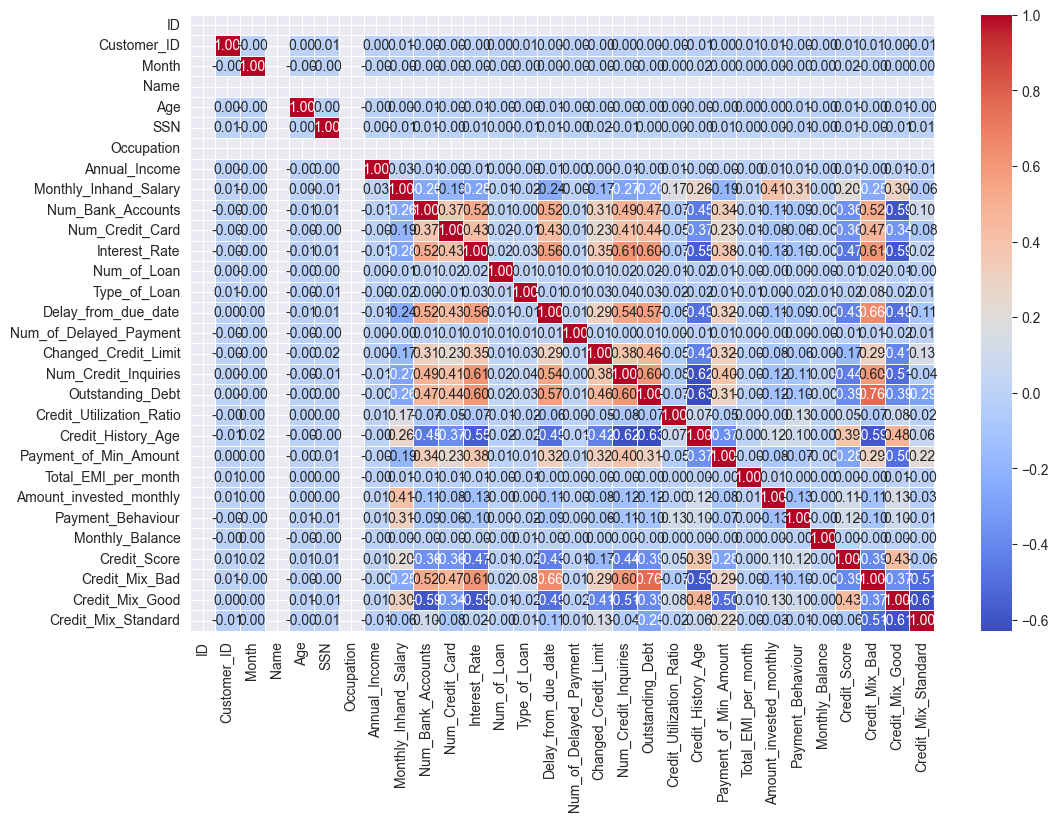

In [52]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)

# Show the plot
plt.show()

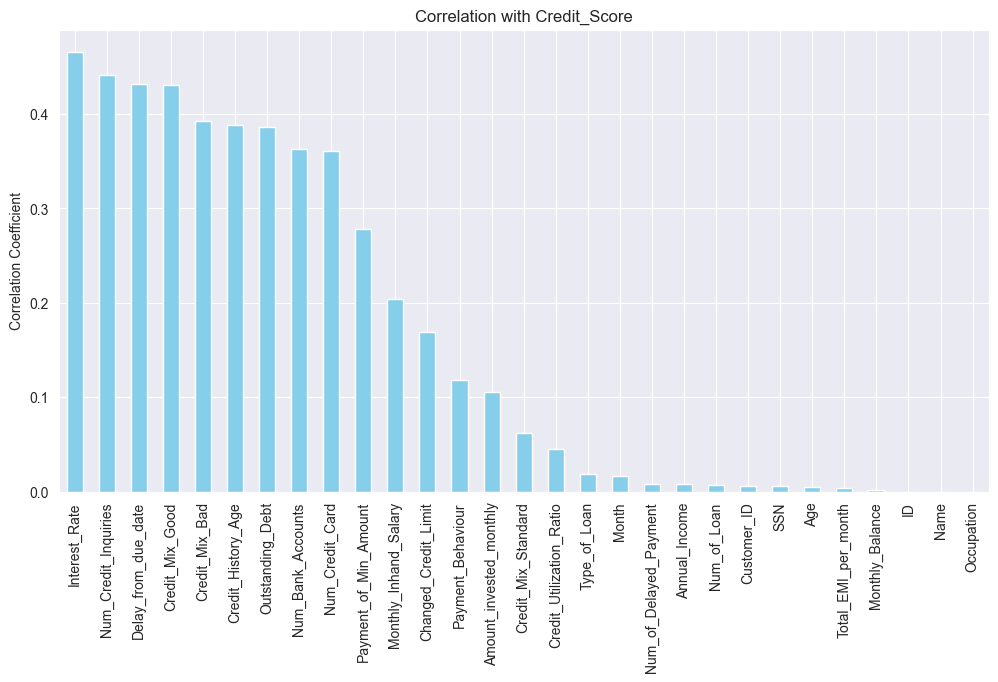

In [53]:
#Let's build the correlation matrix to see which columns are the most correlated with the credit score

correlation_matrix = df.corr()
credit_score_correlations = correlation_matrix['Credit_Score']

sorted_correlations = credit_score_correlations.abs().sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
sorted_correlations.drop('Credit_Score').plot(kind='bar', color='skyblue')
plt.title('Correlation with Credit_Score')
plt.ylabel('Correlation Coefficient')
plt.show()

**MODEL**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [61]:
def replace_nan_with_mean(df):
    return df.fillna(df.mean())


df = replace_nan_with_mean(df)


#**Random Forest**

In [62]:
columns_to_drop = [
    'Credit_Score', 'Amount_invested_monthly', 'Credit_Mix_Standard',
    'Credit_Utilization_Ratio', 'Month', 'Num_of_Delayed_Payment',
    'Annual_Income', 'Num_of_Loan', 'Customer_ID', 'SSN', 'ID',
    'Total_EMI_per_month', 'Monthly_Balance', 'Name', 'Occupation', 'Payment_Behaviour', 'Type_of_Loan','Changed_Credit_Limit'
]



In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


features = df.drop(columns=columns_to_drop, axis=1)  # Features (X)
target = df['Credit_Score']  # Target variable (y)


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


rf_model = RandomForestClassifier(n_estimators=100, random_state=42,min_samples_leaf=1,)


rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy our model is : {accuracy} %')




Accuracy: 0.8043


In [64]:

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

cv_scores = cross_val_score(rf_model, features, target, cv=5)

# Calculate the average and standard deviation of the cross-validation scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print(f'Average CV Score: {mean_cv_score}')
print(f'Standard Deviation of CV Scores: {std_cv_score}')


Average CV Score: 0.6771800000000001
Standard Deviation of CV Scores: 0.007009821681041553


Let's have a look how how complex the model is by looking at the number of trees in the forest

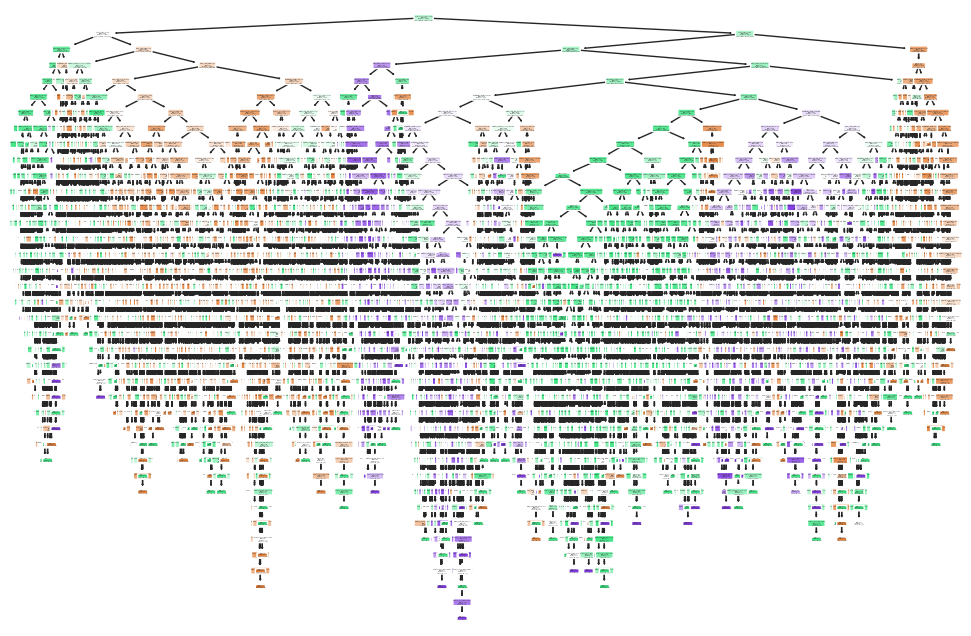

In [66]:
from sklearn.tree import plot_tree
tree = rf_model.estimators_[0]

plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=features.columns, filled=True, rounded=True)
plt.show()


# **Gradient Boosting**

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
# Initializing the Gradient Boosting model
gb_model = GradientBoostingClassifier()

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
# Training the model
gb_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = gb_model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
# Evaluating the model
print(f"Accuracy is {accuracy}")



Accuracy is 0.71075


# **K-NN**

In [68]:
from sklearn.neighbors import KNeighborsClassifier
# Initializing the K-NN model

number = [1,2,3,4,5,6,7,8,9,10]

for i in number:
  knn_model = KNeighborsClassifier(n_neighbors=i)
  X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

  # Training the model
  knn_model.fit(X_train, y_train)

  # Making predictions on the test set
  y_pred = knn_model.predict(X_test)

  # Evaluating the model

  accuracy = accuracy_score(y_test,y_pred)
  print(f"Accuracy is {accuracy}")
  print("\n")



Accuracy is 0.76225

Accuracy is 0.7662

Accuracy is 0.7741

Accuracy is 0.77325

Accuracy is 0.7775

Accuracy is 0.76825

Accuracy is 0.75875

Accuracy is 0.73995

Accuracy is 0.72175

Accuracy is 0.70555



In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        0 non-null       float64
 1   Customer_ID               100000 non-null  float64
 2   Month                     100000 non-null  int64  
 3   Name                      0 non-null       float64
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  int64  
 6   Occupation                0 non-null       float64
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int64  
 13  Type_of_Loan              100000 non-null  fl

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Split the data into features (X) and target variable (y)
X = df.drop(columns=columns_to_drop, axis=1)  # Features
y = df['Credit_Score']  # Target



# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[4757 1050   31]
 [1197 8640  794]
 [   6  836 2689]]

Classification Report:
              precision    recall  f1-score   support

         1.0       0.80      0.81      0.81      5838
         2.0       0.82      0.81      0.82     10631
         3.0       0.77      0.76      0.76      3531

    accuracy                           0.80     20000
   macro avg       0.79      0.80      0.80     20000
weighted avg       0.80      0.80      0.80     20000


Accuracy Score:
0.8043


In [71]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the Gradient Boosting model
print("Gradient Boosting - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))

print("\nGradient Boosting - Classification Report:")
print(classification_report(y_test, y_pred_gb))

print("\nGradient Boosting - Accuracy Score:")
print(accuracy_score(y_test, y_pred_gb))

Gradient Boosting - Confusion Matrix:
[[3979 1458  401]
 [1505 7781 1345]
 [ 134  942 2455]]

Gradient Boosting - Classification Report:
              precision    recall  f1-score   support

         1.0       0.71      0.68      0.69      5838
         2.0       0.76      0.73      0.75     10631
         3.0       0.58      0.70      0.64      3531

    accuracy                           0.71     20000
   macro avg       0.69      0.70      0.69     20000
weighted avg       0.72      0.71      0.71     20000


Gradient Boosting - Accuracy Score:
0.71075


In [72]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train a K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # Specify the number of neighbors (5 in this case)
knn_classifier.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the K-NN model
print("K-Nearest Neighbors - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

print("\nK-Nearest Neighbors - Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("\nK-Nearest Neighbors - Accuracy Score:")
print(accuracy_score(y_test, y_pred_knn))

K-Nearest Neighbors - Confusion Matrix:
[[4781 1030   27]
 [1461 8290  880]
 [  74  978 2479]]

K-Nearest Neighbors - Classification Report:
              precision    recall  f1-score   support

         1.0       0.76      0.82      0.79      5838
         2.0       0.81      0.78      0.79     10631
         3.0       0.73      0.70      0.72      3531

    accuracy                           0.78     20000
   macro avg       0.76      0.77      0.77     20000
weighted avg       0.78      0.78      0.78     20000


K-Nearest Neighbors - Accuracy Score:
0.7775


Our best model is the Random Forest Classifier with an accuracy of 80%.

 Based on the correlation matrix we can see that the most important features are the Credit_Mix_Standard, Credit_Utilization_Ratio, Num_of_Delayed_Payment, Annual_Income, Num_of_Loan, Customer_ID, SSN, ID, Total_EMI_per_month, Monthly_Balance, Name, Occupation, Payment_Behaviour, Type_of_Loan, Changed_Credit_Limit.
 
Based on the confusion matrix we can see that the model is not overfitting and is performing well on the test set.

Let's save the model

In [73]:
import pickle


In [74]:
# Save the model to disk
filename = 'finalized_model.sav'
pickle.dump(rf_model, open(filename, 'wb'))


In [75]:
# Load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))


In [76]:
# Make predictions on the test set
y_pred = loaded_model.predict(X_test)


In [79]:
# Evaluate the model
print("Confusion Matrix:")
print("\n")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:


[[4757 1050   31]
 [1197 8640  794]
 [   6  836 2689]]
